In [99]:
from imports import *

In [100]:
query = "select * from cleaned_application_ml"
app_data = sql_connect(query)
app_data.head()

Connection to SQL Server established successfully.
Connection closed.


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AVERAGE_EXTERNAL_RATING,TOT_PREV_APP,PREV_APPROVED_CNT,PREV_CANCELLED_CNT,PREV_REFUSED_CNT,PREV_UNUSED_CNT,ISMISSING_BUREAU_INFO
0,0,Cash loans,F,1,1,0,202500.0,1157958.0,49189.5,1035000.0,Family,Working,Secondary / secondary special,Single / not married,House / apartment,0.010966,-19420,-5026,-9353.0,-2960.0,9,1,1,0,1,0,0,Laborers,1,2,2,SUNDAY,12,0,0,0,0,0,0,Construction,0,0,0,0,-373,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,0.4783,0,0,0,0,0,0
1,1,Cash loans,F,0,1,0,157500.0,675000.0,80239.5,675000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.072508,-15884,-1136,-10039.0,-4841.0,-1,1,1,0,1,1,0,Sales staff,2,1,1,SATURDAY,16,0,0,0,0,0,0,Other,0,0,0,0,-3480,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.7613,0,0,0,0,0,1
2,0,Cash loans,F,0,1,0,45000.0,1125000.0,32895.0,1125000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.018850,-21000,365243,-11124.0,-4050.0,-1,1,0,0,1,1,0,Retired,2,2,2,MONDAY,13,0,0,0,0,0,0,NA,0,0,0,0,-1186,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.7298,0,0,0,0,0,0
3,0,Cash loans,F,1,1,1,225000.0,1546020.0,42642.0,1350000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.007020,-15286,-7412,-6704.0,-529.0,1,1,1,0,1,0,0,Core staff,3,2,2,WEDNESDAY,13,0,0,0,0,0,0,School,2,0,2,0,-700,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.5841,0,0,0,0,0,0
4,0,Cash loans,M,1,1,2,47250.0,180000.0,11632.5,180000.0,Family,Working,Secondary / secondary special,Married,House / apartment,0.018850,-15060,-603,-2561.0,-5112.0,37,1,1,1,1,0,0,Unknown,4,2,2,MONDAY,10,0,0,0,0,0,0,Business Entity Type 1,10,1,10,1,-2768,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.4758,0,0,0,0,0,0


In [101]:
final_ml_data = app_data.copy()

In [54]:
numeric_col = [col for col in app_data.columns if app_data[col].dtype != 'object' and app_data[col].nunique() > 2 and col not in ['SK_ID_CURR', 'TARGET']]

### Class imbalance is there

Text(0.5, 0, 'Target')

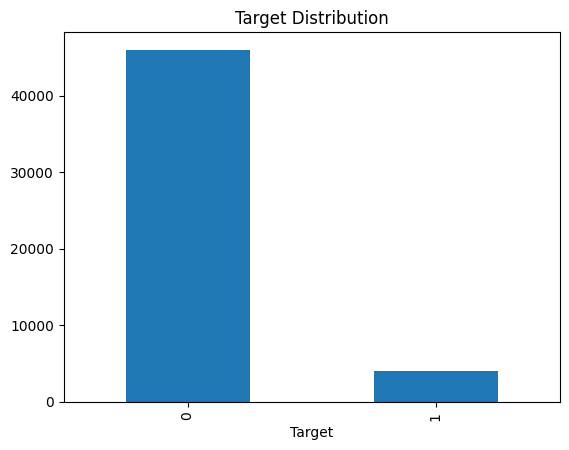

In [55]:
app_data['TARGET'].value_counts().plot(kind='bar', title='Target Distribution')
plt.xlabel('Target')    

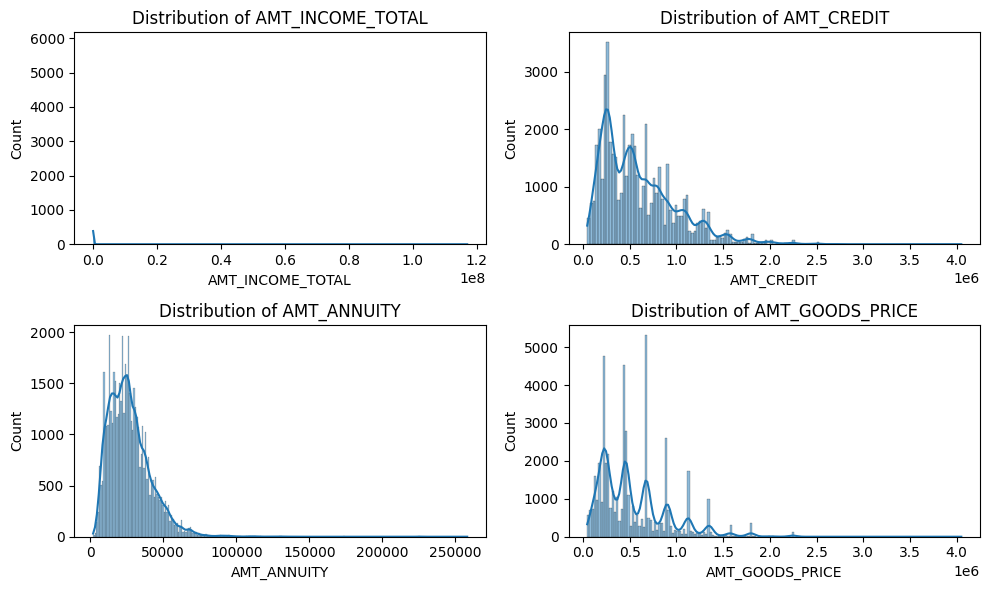

In [56]:
fig, ax = plt.subplots(2, 2, figsize=(10, 6))
ax = ax.flatten()
for i, col in enumerate(numeric_col[1:5]):
    sns.histplot(app_data[col], kde=True, ax=ax[i])
    ax[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show();

All the amount-related features are highly skewed. To preserve the data and mitigate the effect of outliers, a log transformation will be applied. This will help in reducing skewness and improving the distribution for further analysis.

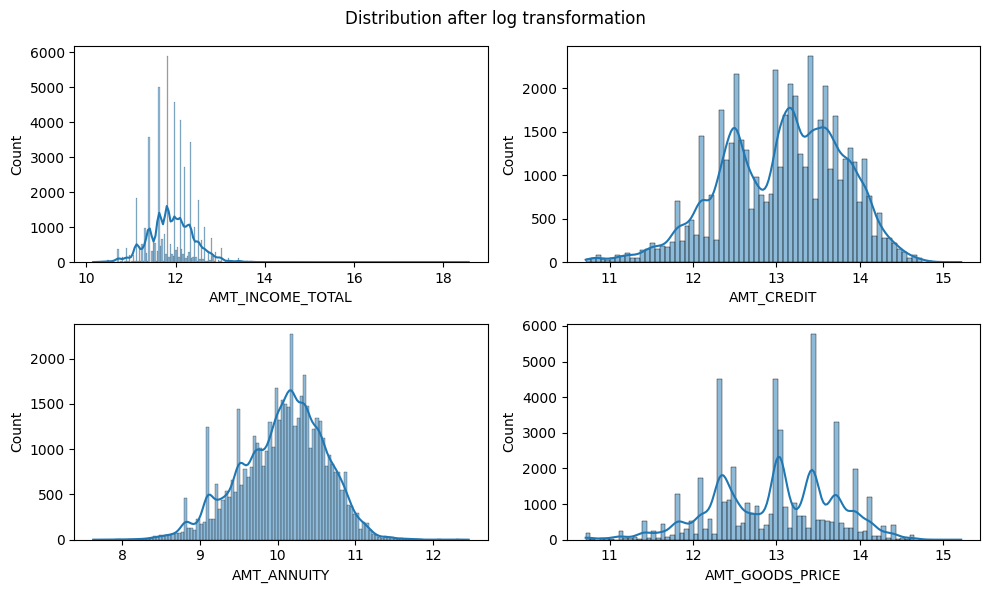

In [57]:
fig, ax = plt.subplots(2, 2, figsize=(10, 6))
ax = ax.flatten()
for i, col in enumerate(numeric_col[1:5]):
    sns.histplot(np.log1p(app_data[col]), kde=True, ax=ax[i])
plt.suptitle(f'Distribution after log transformation')
plt.tight_layout()
plt.show();

The log transformation has worked well, bringing all values within a reasonable range. However, there remains one influential point in AMT_INCOME_TOTAL that warrants further investigation. It may be an outlier or a data entry error and will be reviewed accordingly.

In [58]:
app_data[app_data['AMT_INCOME_TOTAL'] == app_data['AMT_INCOME_TOTAL'].max()]

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AVERAGE_EXTERNAL_RATING,TOT_PREV_APP,PREV_APPROVED_CNT,PREV_CANCELLED_CNT,PREV_REFUSED_CNT,PREV_UNUSED_CNT,ISMISSING_BUREAU_INFO
41964,1,Cash loans,F,0,1,1,117000000.0,562491.0,26194.5,454500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010643,-12615,-922,-6762.0,-3643.0,-1,1,1,0,1,0,0,Laborers,3,2,2,TUESDAY,14,0,0,0,0,0,0,Business Entity Type 3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.2398,0,0,0,0,0,0


A Laborer with such an unusually high income is highly unlikely, suggesting a possible data entry error. Therefore, this record is considered an outlier and will be removed, as it does not represent a valid or informative data point.

In [59]:
app_data.drop(12840, inplace=True)

### Updating the db with removed outlier

In [60]:
engine = write_sql_conn_create()
app_data.to_sql('cleaned_application_ml', engine, if_exists='replace', index=False)

Connection to SQL Server established successfully.


21

In [ ]:
for col in numeric_col[1:5]:
    app_data[col] = np.log1p(app_data[col])

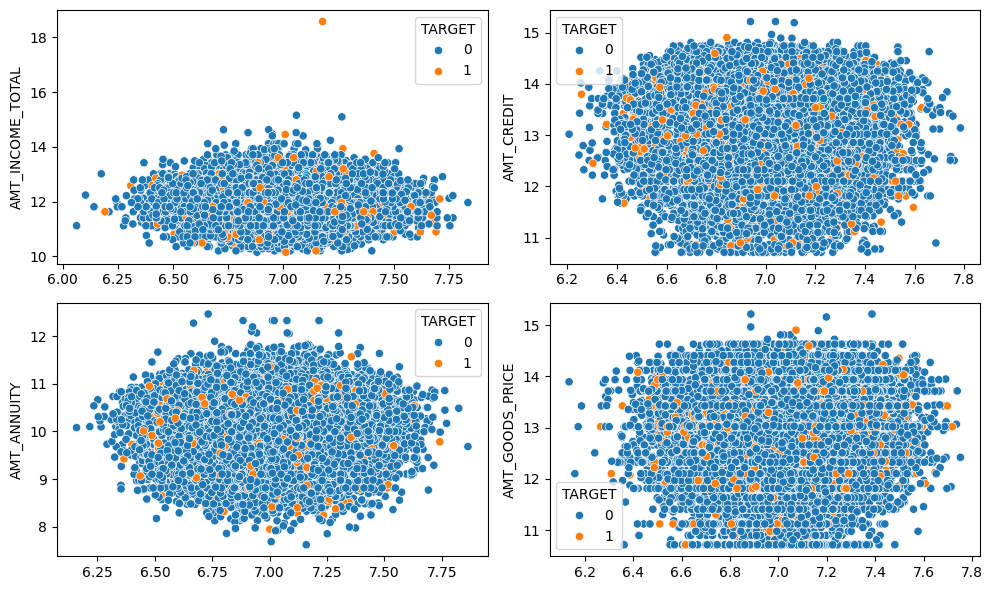

In [62]:
fig, ax = plt.subplots(2, 2, figsize=(10, 6))
ax = ax.flatten()
for i, col in enumerate(numeric_col[1:5]):
   
    sns.scatterplot(x=np.random.normal(7, 0.2, size=len(app_data)), y=app_data[col], ax=ax[i], hue=app_data['TARGET'])
plt.tight_layout()
plt.show()

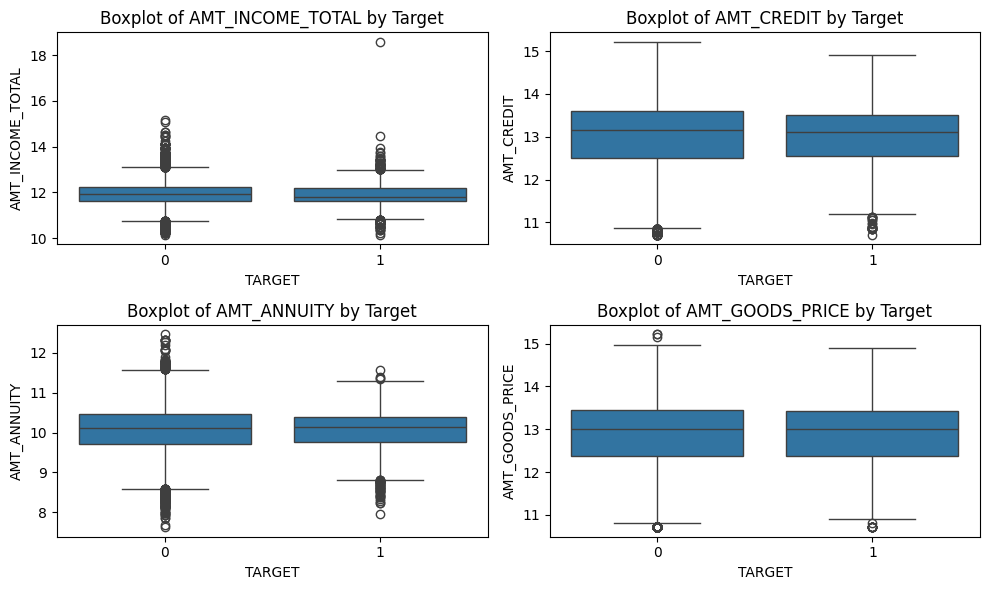

In [63]:
fig, ax = plt.subplots(2, 2, figsize=(10, 6))
ax = ax.flatten()
for i, col in enumerate(numeric_col[1:5]):
    #column = col  + '_LOG'
    sns.boxplot(x = 'TARGET', y = col, ax=ax[i], data=app_data)
    ax[i].set_title(f'Boxplot of {col} by Target')
plt.tight_layout()
plt.show();

It does not appear that repayment difficulties are strongly dependent on the most important individual columns. Since the dataset contains a large number of features, visualizing each one would be impractical. Therefore, dimensionality reduction is necessary to uncover meaningful patterns.


<Axes: xlabel='N_DOCUMENTS_PROVIDED', ylabel='count'>

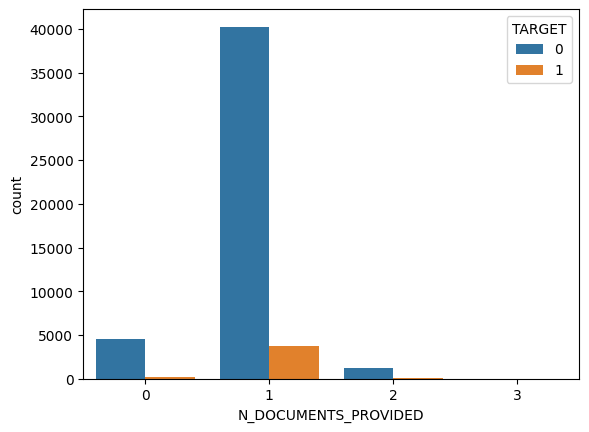

In [64]:
app_data['N_DOCUMENTS_PROVIDED'] = app_data[[col for col in app_data.columns if 'FLAG_DOCUMENT_' in col]].sum(axis=1)

sns.countplot(data=app_data, x='N_DOCUMENTS_PROVIDED', hue='TARGET')

Here I am assuming, the user will be porviding flag doc 1 whoch mandatory but aprat from that how many docs porvided but the field looks very very low variance

However, creating a new field bianry which says if additional_doc_provided, and delete all other values to decreas esaprsity


In [65]:
app_data["ADDITIONAL_DOC_PROVIDED"] = app_data["N_DOCUMENTS_PROVIDED"] > 0
app_data.drop(columns=[col for col in app_data.columns if 'FLAG_DOCUMENT_' in col or 'N_DOCUMENTS_PROVIDED' in col], inplace=True)
app_data.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AVERAGE_EXTERNAL_RATING,TOT_PREV_APP,PREV_APPROVED_CNT,PREV_CANCELLED_CNT,PREV_REFUSED_CNT,PREV_UNUSED_CNT,ISMISSING_BUREAU_INFO,ADDITIONAL_DOC_PROVIDED
0,0,Cash loans,M,1,1,1,12.645942,13.292209,10.602058,13.017005,"Spouse, partner",Working,Secondary / secondary special,Married,House / apartment,0.046220,-13858,-430,-3777.0,-3911.0,1,1,1,0,1,0,0,Drivers,3,1,1,TUESDAY,14,0,0,0,1,1,0,Business Entity Type 3,5,0,5,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.5760,0,0,0,0,0,0,True
1,0,Cash loans,F,0,1,0,11.630717,13.603123,10.169212,13.422469,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.020713,-16351,-634,-5438.0,-4907.0,-1,1,1,1,1,0,0,Laborers,2,3,3,WEDNESDAY,6,0,0,0,0,0,0,Business Entity Type 3,3,0,3,0,-1007,0.0,0.0,0.0,0.0,0.0,2.0,0.4327,0,0,0,0,0,0,True
2,0,Cash loans,F,1,1,2,11.813037,13.422469,10.118619,13.422469,Unaccompanied,Working,Higher education,Married,House / apartment,0.028663,-9973,-730,-256.0,-2602.0,0,1,1,0,1,0,0,Core staff,4,2,2,MONDAY,14,0,0,0,0,0,0,Bank,5,2,5,1,-1733,0.0,0.0,0.0,0.0,0.0,3.0,0.4652,0,0,0,0,0,0,True
3,0,Cash loans,F,0,1,0,11.669938,13.923325,10.764752,13.710151,"Spouse, partner",Pensioner,Secondary / secondary special,Married,House / apartment,0.008474,-19157,365243,-4406.0,-2689.0,-1,1,0,0,1,0,0,Retired,2,2,2,FRIDAY,11,0,0,0,0,0,0,NA,4,0,4,0,-1169,0.0,0.0,0.0,0.0,0.0,0.0,0.5850,0,0,0,0,0,0,True
4,0,Cash loans,F,0,1,0,12.323860,13.222310,10.687069,13.075274,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,0.014464,-10212,-489,-954.0,-2892.0,-1,1,1,0,1,0,0,Managers,1,2,2,THURSDAY,3,0,0,0,0,0,0,Trade: type 7,2,2,2,1,-649,0.0,0.0,0.0,0.0,0.0,0.0,0.6350,2,1,0,1,0,1,True


In [66]:
app_data.groupby('ADDITIONAL_DOC_PROVIDED')['TARGET'].value_counts().unstack()


TARGET,0,1
ADDITIONAL_DOC_PROVIDED,,
False,4494,249
True,41473,3777


### Here also no luck, most defaulters has provided the documents

In [67]:
[col for col in app_data.columns if 'DAYS' in col]

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

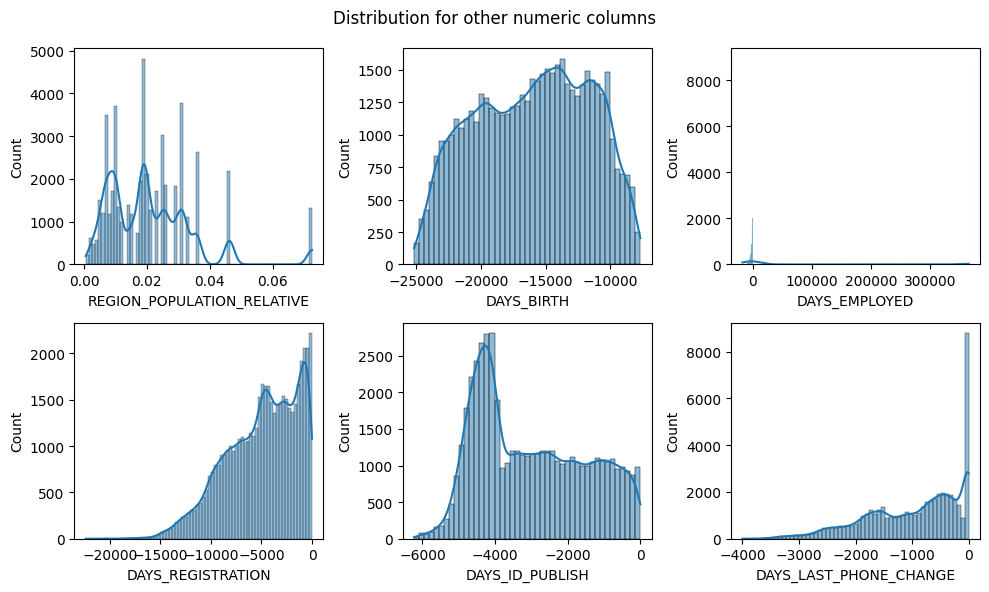

In [68]:
fig, ax = plt.subplots(2, 3, figsize=(10, 6))
ax = ax.flatten()
for i, col in enumerate([col for col in app_data.columns if 'DAYS' in col or 'REGION_POPULATION_RELATIVE' in col]):
    sns.histplot(app_data[col], kde=True, ax=ax[i])
plt.suptitle(f'Distribution for other numeric columns')
plt.tight_layout()
plt.show();

#### Days Employed has outleier maybe indication not employes



<Axes: ylabel='DAYS_EMPLOYED'>

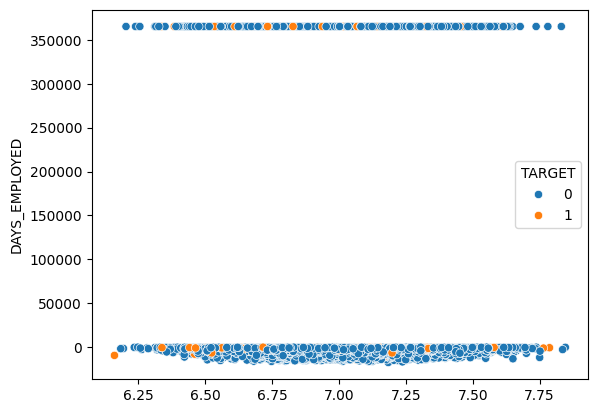

In [69]:
sns.scatterplot(x=np.random.normal(7, 0.2, size=len(app_data)), y=app_data['DAYS_EMPLOYED'], hue=app_data['TARGET'])

In [70]:
app_data[app_data['DAYS_EMPLOYED'] == app_data['DAYS_EMPLOYED'].max()].head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AVERAGE_EXTERNAL_RATING,TOT_PREV_APP,PREV_APPROVED_CNT,PREV_CANCELLED_CNT,PREV_REFUSED_CNT,PREV_UNUSED_CNT,ISMISSING_BUREAU_INFO,ADDITIONAL_DOC_PROVIDED
3,0,Cash loans,F,0,1,0,11.669938,13.923325,10.764752,13.710151,"Spouse, partner",Pensioner,Secondary / secondary special,Married,House / apartment,0.008474,-19157,365243,-4406.0,-2689.0,-1,1,0,0,1,0,0,Retired,2,2,2,FRIDAY,11,0,0,0,0,0,0,NA,4,0,4,0,-1169,0.0,0.0,0.0,0.0,0.0,0.0,0.5850,0,0,0,0,0,0,True
9,0,Cash loans,F,0,1,0,11.119898,10.896758,8.592672,10.896758,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.006207,-24805,365243,-941.0,-3950.0,-1,1,0,0,1,1,0,Retired,1,2,2,SATURDAY,12,0,0,0,0,0,0,NA,2,0,2,0,-69,0.0,0.0,0.0,0.0,0.0,3.0,0.5209,0,0,0,0,0,0,True
10,0,Cash loans,F,1,0,0,11.302217,13.017005,9.530647,13.017005,Unaccompanied,Pensioner,Secondary / secondary special,Single / not married,House / apartment,0.015221,-21100,365243,-301.0,-4269.0,8,1,0,0,1,1,0,Retired,1,2,2,SATURDAY,15,0,0,0,0,0,0,NA,0,0,0,0,-229,0.0,0.0,0.0,0.0,2.0,0.0,0.5241,0,0,0,0,0,0,True
12,0,Cash loans,F,1,1,0,11.813037,12.820504,10.032254,12.586223,Group of people,Pensioner,Secondary / secondary special,Married,House / apartment,0.003813,-22103,365243,-3179.0,-4648.0,16,1,0,0,1,0,1,Retired,2,2,2,WEDNESDAY,12,0,0,0,0,0,0,NA,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0,0.2327,0,0,0,0,0,0,True
25,0,Cash loans,F,0,1,0,12.218500,13.715139,10.557205,13.715139,Family,Pensioner,Higher education,Single / not married,House / apartment,0.005002,-18540,365243,-4545.0,-2091.0,-1,1,0,0,1,1,0,Retired,1,3,3,SATURDAY,12,0,0,0,0,0,0,NA,2,0,2,0,-405,0.0,0.0,0.0,0.0,0.0,5.0,0.6412,1,1,0,0,0,0,True


In [71]:
app_data[app_data['DAYS_EMPLOYED'] == app_data['DAYS_EMPLOYED'].max()]['NAME_INCOME_TYPE'].unique()

array(['Pensioner', 'Unemployed'], dtype=object)

Imputing them with 0

In [72]:
app_data['DAYS_EMPLOYED'] = app_data['DAYS_EMPLOYED'].replace(365243, 0)

coNVERTING ALL OF tHEM TO YEARS 


In [73]:
for col in [col for col in app_data.columns if 'DAYS' in col]:
    app_data[f'YEARS{col[4:]}'] = app_data[col]/365
    app_data.drop(col, axis=1, inplace=True)

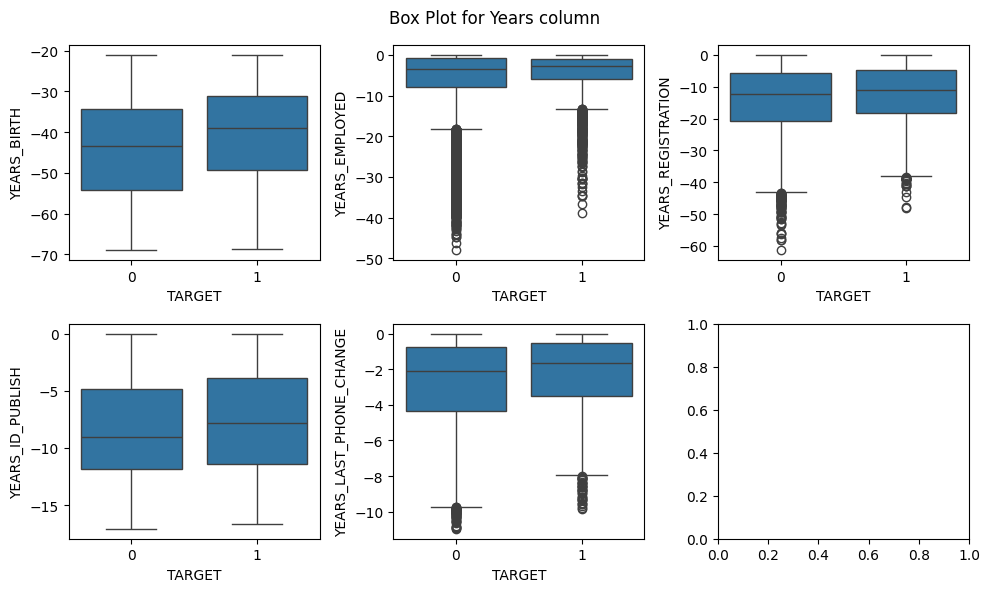

In [74]:
fig, ax = plt.subplots(2, 3, figsize=(10, 6))
ax = ax.flatten()
for i, col in enumerate([col for col in app_data.columns if 'YEARS' in col ]):
    sns.boxplot(x = 'TARGET', y = col, ax=ax[i], data=app_data)
plt.suptitle(f'Box Plot for Years column')
plt.tight_layout()
plt.show();

### Date of birth and years_id_publish shows slight difference in both target might be use full for modeing, on the other handfor defaulter s median change in phone number reflect frequent changes in phone number, alos

Appling log transform on years_employed, years last phone change and years registration

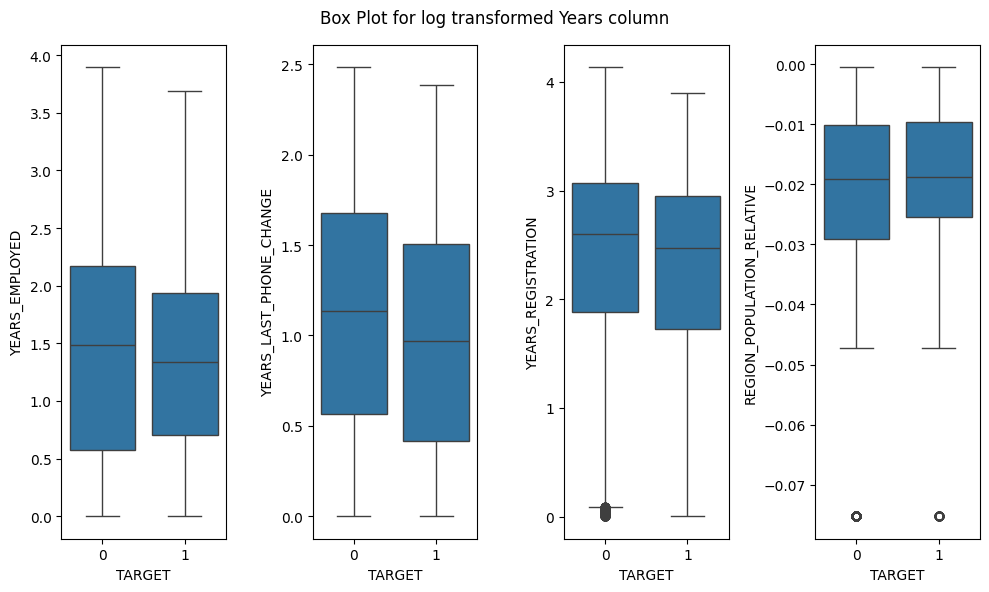

In [75]:
fig, ax = plt.subplots(1, 4, figsize=(10, 6))
ax = ax.flatten()
for i, col in enumerate([col for col in ['YEARS_EMPLOYED', 'YEARS_LAST_PHONE_CHANGE', 'YEARS_REGISTRATION', 'REGION_POPULATION_RELATIVE']]):
    sns.boxplot(x = app_data['TARGET'], y = np.log1p(-app_data[col]), ax=ax[i])
plt.suptitle(f'Box Plot for log transformed Years column')
plt.tight_layout()
plt.show();

### Now the realtion looks clear,
defaulter has less employment years and frequent phone change

we can drop region_populatoiun relative as it is not adding values

In [76]:
for col in [col for col in ['YEARS_EMPLOYED', 'YEARS_LAST_PHONE_CHANGE', 'YEARS_REGISTRATION']]:
    app_data[f'{col}_LOG'] = np.log1p(-app_data[col])
    app_data.drop(col, axis=1, inplace=True)

In [77]:
app_data['NAME_HOUSING_TYPE'].unique()

array(['House / apartment', 'Office apartment', 'With parents',
       'Municipal apartment', 'Rented apartment', 'Co-op apartment'],
      dtype=object)

In [78]:
familiy_and_gen_default = app_data.groupby(['CODE_GENDER', 'NAME_FAMILY_STATUS'])['TARGET'].value_counts().unstack()
familiy_and_gen_default['Default rate'] = 100 * round(familiy_and_gen_default[1]/ familiy_and_gen_default[[0,1]].sum(axis=1), 2)
familiy_and_gen_default

TARGET                                  0       1  Default rate
CODE_GENDER NAME_FAMILY_STATUS                                 
F           Civil marriage         3087.0   283.0           8.0
            Married               18597.0  1301.0           7.0
            Separated              2278.0   186.0           8.0
            Single / not married   4280.0   362.0           8.0
            Widow                  2313.0   132.0           5.0
M           Civil marriage         1290.0   199.0          13.0
            Married               11096.0  1094.0           9.0
            Separated               592.0    86.0          13.0
            Single / not married   2296.0   367.0          14.0
            Unknown                   1.0     NaN           NaN
            Widow                   135.0    16.0          11.0
Unspecified Married                   2.0     NaN           NaN

In [79]:
apartment_info = app_data.groupby(['NAME_HOUSING_TYPE'])['TARGET'].value_counts().unstack()
apartment_info['Default rate'] = 100 * round(apartment_info[1]/ apartment_info[[0,1]].sum(axis=1), 2)
apartment_info

TARGET,0,1,Default rate
NAME_HOUSING_TYPE,,,
Co-op apartment,176,15,8.0
House / apartment,40889,3473,8.0
Municipal apartment,1700,145,8.0
Office apartment,398,29,7.0
Rented apartment,682,87,11.0
With parents,2122,277,12.0


In [80]:
edu_info = app_data.groupby(['NAME_EDUCATION_TYPE'])['TARGET'].value_counts().unstack()
edu_info['Default rate'] = 100 * round(edu_info[1]/ edu_info[[0,1]].sum(axis=1), 2)
edu_info

TARGET,0,1,Default rate
NAME_EDUCATION_TYPE,,,
Academic degree,20.0,NaN,NaN
Higher education,11560.0,606.0,5.0
Incomplete higher,1482.0,138.0,9.0
Lower secondary,547.0,73.0,12.0
Secondary / secondary special,32358.0,3209.0,9.0


In [81]:
suite_info = app_data.groupby(['NAME_TYPE_SUITE'])['TARGET'].value_counts().unstack()
suite_info['Default rate'] = 100 * round(suite_info[1]/ suite_info[[0,1]].sum(axis=1), 2)
suite_info

TARGET,0,1,Default rate
NAME_TYPE_SUITE,,,
Children,495,47,9.0
Family,6050,499,8.0
Group of people,35,1,3.0
Other_A,127,10,7.0
Other_B,231,28,11.0
"Spouse, partner",1705,144,8.0
Unaccompanied,37139,3290,8.0
Unspecified,185,7,4.0


Removing Name type suite

In [82]:
app_data.drop('NAME_TYPE_SUITE', axis=1, inplace = True)

In [83]:
income_info = app_data.groupby(['OCCUPATION_TYPE', 'NAME_INCOME_TYPE'])['TARGET'].value_counts().unstack()
income_info['Default rate'] = 100 * round(income_info[1]/ income_info[[0,1]].sum(axis=1), 2)
income_info.transpose()

OCCUPATION_TYPE           Accountants                        \
NAME_INCOME_TYPE Commercial associate State servant Working   
TARGET                                                        
0                               630.0         116.0   794.0   
1                                30.0           3.0    48.0   
Default rate                      5.0           3.0     6.0   

OCCUPATION_TYPE        Cleaning staff                        \
NAME_INCOME_TYPE Commercial associate State servant Working   
TARGET                                                        
0                               114.0          39.0   518.0   
1                                15.0           2.0    51.0   
Default rate                     12.0           5.0     9.0   

OCCUPATION_TYPE         Cooking staff                        \
NAME_INCOME_TYPE Commercial associate State servant Working   
TARGET                                                        
0                               191.0          61.0   610.0   
1                                23.0           6.0    72.0   
Default rate                     11.0           9.0    11.0   

OCCUPATION_TYPE            Core staff                        \
NAME_INCOME_TYPE Commercial associate State servant Working   
TARGET                                                        
0                               976.0        1049.0  2157.0   
1                                63.0          40.0   147.0   
Default rate                      6.0           4.0     6.0   

OCCUPATION_TYPE               Drivers                                \
NAME_INCOME_TYPE Commercial associate State servant Student Working   
TARGET                                                                
0                               723.0         117.0     1.0  1864.0   
1                                78.0          11.0     NaN   249.0   
Default rate                     10.0           9.0     NaN    12.0   

OCCUPATION_TYPE  Government Roles             HR staff                        \
NAME_INCOME_TYPE    State servant Commercial associate State servant Working   
TARGET                                                                         
0                           595.0                 33.0          14.0    45.0   
1                            40.0                  3.0           NaN     6.0   
Default rate                  6.0                  8.0           NaN    12.0   

OCCUPATION_TYPE  High skill tech staff                        \
NAME_INCOME_TYPE  Commercial associate State servant Working   
TARGET                                                         
0                                520.0         166.0  1048.0   
1                                 34.0          16.0    68.0   
Default rate                       6.0           9.0     6.0   

OCCUPATION_TYPE              IT staff                        \
NAME_INCOME_TYPE Commercial associate State servant Working   
TARGET                                                        
0                                35.0          11.0    30.0   
1                                 1.0           2.0     1.0   
Default rate                      3.0          15.0     3.0   

OCCUPATION_TYPE              Laborers                                \
NAME_INCOME_TYPE Commercial associate State servant Student Working   
TARGET                                                                
0                              1898.0         291.0     2.0  5839.0   
1                               179.0          26.0     NaN   715.0   
Default rate                      9.0           8.0     NaN    11.0   

OCCUPATION_TYPE    Low-skill Laborers                          Managers  \
NAME_INCOME_TYPE Commercial associate State servant Working Businessman   
TARGET                                                                    
0                                54.0           2.0   240.0         2.0   
1                                11.0           NaN    50.0         NaN   
Default ra

WE WILL KEEP THOS

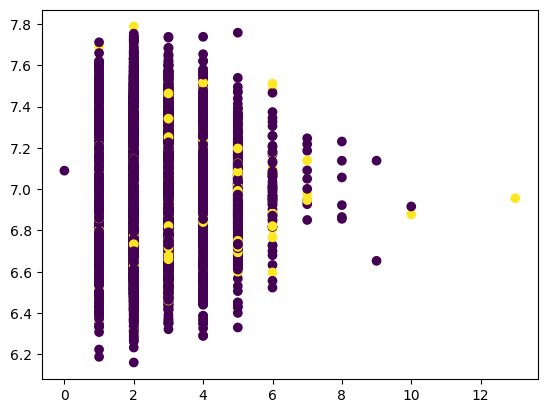

In [84]:
plt.scatter(app_data['CNT_FAM_MEMBERS'], np.random.normal(7, 0.2, size=len(app_data)), c=app_data['TARGET'])

With univariate analysis this doesnt seem usefule

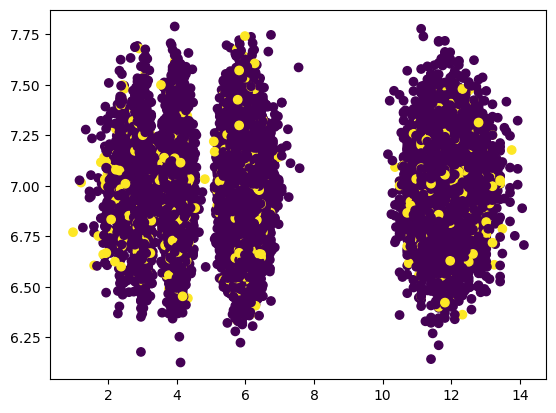

In [85]:
plt.scatter(app_data['AMT_INCOME_TOTAL']/app_data['CNT_FAM_MEMBERS'], np.random.normal(7, 0.2, size=len(app_data)), c=app_data['TARGET'])

👉 Clients with low income per family member → more defaults.
👉 High income per member → safer borrowers.

In [86]:
app_data['INCOME_PER_MEM'] = app_data['AMT_INCOME_TOTAL']/app_data['CNT_FAM_MEMBERS']
app_data.drop('CNT_FAM_MEMBERS', axis=1, inplace=True)

In [87]:
app_data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Index: 49993 entries, 0 to 49993
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TARGET                       49993 non-null  int64  
 1   NAME_CONTRACT_TYPE           49993 non-null  object 
 2   CODE_GENDER                  49993 non-null  object 
 3   FLAG_OWN_CAR                 49993 non-null  int64  
 4   FLAG_OWN_REALTY              49993 non-null  int64  
 5   CNT_CHILDREN                 49993 non-null  int64  
 6   AMT_INCOME_TOTAL             49993 non-null  float64
 7   AMT_CREDIT                   49993 non-null  float64
 8   AMT_ANNUITY                  49993 non-null  float64
 9   AMT_GOODS_PRICE              49993 non-null  float64
 10  NAME_INCOME_TYPE             49993 non-null  object 
 11  NAME_EDUCATION_TYPE          49993 non-null  object 
 12  NAME_FAMILY_STATUS           49993 non-null  object 
 13  NAME_HOUSING_TYPE    

In [ ]:
WEEKDAY_APPR_PROCESS_START

In [91]:
week_info = app_data.groupby(['WEEKDAY_APPR_PROCESS_START'])['TARGET'].value_counts().unstack()
week_info['Default rate'] = 100 * round(week_info[1]/ week_info[[0,1]].sum(axis=1), 2)
week_info

TARGET,0,1,Default rate
WEEKDAY_APPR_PROCESS_START,,,
FRIDAY,7615,671,8.0
MONDAY,7728,657,8.0
SATURDAY,5047,419,8.0
SUNDAY,2401,215,8.0
THURSDAY,7469,678,8.0
TUESDAY,8024,717,8.0
WEDNESDAY,7683,669,8.0


No use just random noise

In [92]:
app_data.drop('WEEKDAY_APPR_PROCESS_START', axis=1, inplace=True)

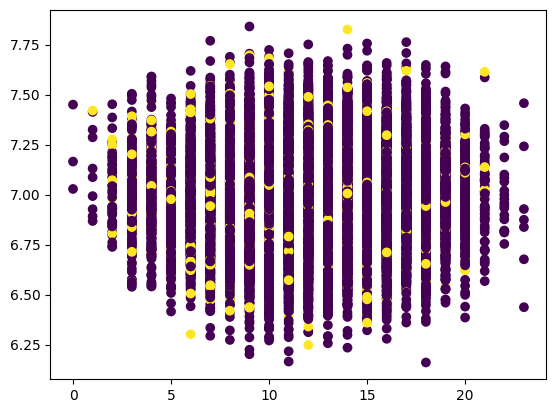

In [94]:
plt.scatter(app_data['HOUR_APPR_PROCESS_START'], np.random.normal(7, 0.2, size=len(app_data)), c=app_data['TARGET'])

Not infomraitve, removing

In [95]:
app_data.drop('HOUR_APPR_PROCESS_START', axis=1, inplace=True)

Final data with dropped columns and row

In [97]:
app_data = app_data.round(4)
engine = write_sql_conn_create()
app_data.to_sql('cleaned_application_ml2', engine, if_exists='replace', index=False)

Connection to SQL Server established successfully.


ProgrammingError: (pyodbc.ProgrammingError) ('42000', '[42000] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]The incoming tabular data stream (TDS) remote procedure call (RPC) protocol stream is incorrect. Parameter 955 (""): The supplied value is not a valid instance of data type float. Check the source data for invalid values. An example of an invalid value is data of numeric type with scale greater than precision. (8023) (SQLExecDirectW)')
[SQL: INSERT INTO cleaned_application_ml2 ([TARGET], [NAME_CONTRACT_TYPE], [CODE_GENDER], [FLAG_OWN_CAR], [FLAG_OWN_REALTY], [CNT_CHILDREN], [AMT_INCOME_TOTAL], [AMT_CREDIT], [AMT_ANNUITY], [AMT_GOODS_PRICE], [NAME_INCOME_TYPE], [NAME_EDUCATION_TYPE], [NAM ... 7241 characters truncated ... , ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)]
[parameters: (0, 'Cash loans', 'F', 0, 1, 0, 11.813, 13.2086, 10.1902, 13.017, 'Working', 'Secondary / secondary special', 'Married', 'House / apartment', 0.0252, -1, 1, 1, 0, 1, 0, 0, 'Accountants', 2, 2, 0, 0, 0, 0, 0, 0, 'Trade: type 7', 0, 0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.482, 0, 0, 0, 0, 0, 1, 1 ... 1972 parameters truncated ... 11.8458, 13.9128, 10.7542, 13.7589, 'Pensioner', 'Higher education', 'Married', 'House / apartment', 0.0358, -1, 1, 0, 0, 1, 0, 0, 'Retired', 2, 2, 0, 0, 0, 1, 0, 0, 'NA', 0, 0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.58, 0, 0, 0, 0, 0, 0, 1, -63.5315, -12.5808, -0.0, -0.0, 3.1231, 5.9229)]
(Background on this error at: https://sqlalche.me/e/20/f405)

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


X = app_data.drop(columns=['TARGET'])
y = app_data['TARGET']

numeric_cols = [col for col in X.columns if X[col].dtype != 'object' and X[col].nunique() > 2]
binary_cols = [col for col in X.columns if X[col].dtype != 'object' and X[col].nunique() == 2]
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
        ('bin', 'passthrough', binary_cols)
    ]
)

X_transformed = preprocessor.fit_transform(X)



In [ ]:
from sklearn.decomposition import  PCA

pca_model = PCA()

pca_x = pca_model.fit_transform(X_transformed)


In [ ]:
cum_var = np.cumsum(pca_model.explained_variance_ratio_)
print(f'{len(cum_var[cum_var < 0.95])} components explain 95% of the variance')

46 components explain 95% of the variance


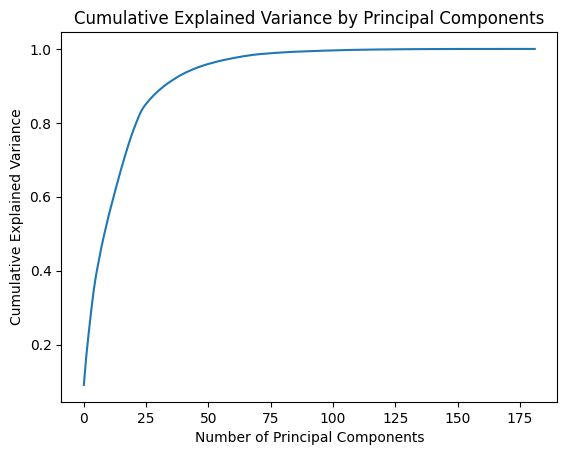

In [ ]:
plt.plot(cum_var)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components');

The first four principal components explain approximately 30% of the total variance. While this provides some insight, it is not sufficient to fully capture the structure of the data. Since plotting all 46 components is not practical, we will limit our visual analysis to the first four principal components.

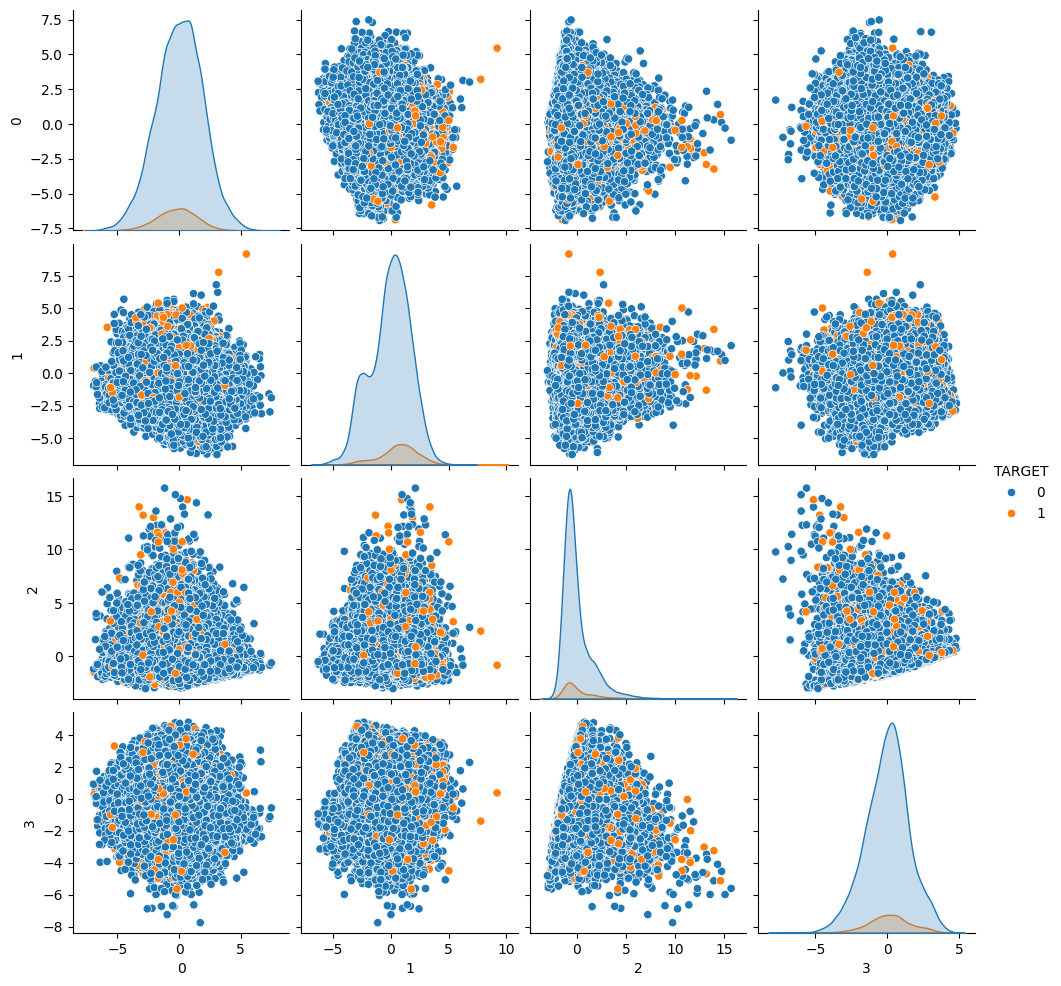

In [ ]:
pca_df = pd.DataFrame(pca_x[:, :4]) 
pca_df['TARGET'] = y.values  


sns.pairplot(pca_df, hue='TARGET')

### No clear seperation

The dataset contains a high number of features (181 columns), many of which are numeric, categorical, or binary. While realtions were explored, meaningful patterns between the features and the target variable (TARGET) were not visually obvious.

Even after applying dimensionality reduction techniques like PCA (Principal Component Analysis) and visualizing the first few principal components, there was no clear separation between classes. This is expected in high-dimensional tabular data, where complex patterns may not be easily captured or visualized in 2D.

Therefore, further exploration via traditional EDA is unlikely to yield actionable insights. We now proceed to modelling, where machine learning algorithms can leverage the full feature space to uncover predictive patterns.